In [1]:
pip install tensorflow==2.10.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip uninstall pytorch

In [3]:
pip install torch torchvision torchaudio


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-mdr skrebate

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tpot

Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

if tf.test.gpu_device_name():
    print('Default GPU Device:', tf.test.gpu_device_name())
else:
    print("Please install GPU version of TF")


Num GPUs Available:  1
Default GPU Device: /device:GPU:0


In [7]:
pip install tensorflow-gpu==2.10

Note: you may need to restart the kernel to use updated packages.


In [9]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



df=pd.read_csv("Ransomware.csv",sep='|')

In [10]:
from sklearn.metrics import f1_score
import sklearn.metrics

In [11]:
df

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


# DATA ANALYSIS

In [12]:
# Checking the size of dataframe
from sys import getsizeof
initial_size = getsizeof(df)/(1024.0**3)
print("Size of DataFrame: {} GB".format(initial_size))

Size of DataFrame: 0.0798260634765029 GB


In [13]:
df.legitimate.value_counts() #1 means legitimate, 0 means ransomeware

0    96724
1    41323
Name: legitimate, dtype: int64

In [14]:
df.legitimate.value_counts() #1 means legitimate, 0 means ransomeware

0    96724
1    41323
Name: legitimate, dtype: int64

In [15]:
df.legitimate = df.legitimate.astype('category')
df.legitimate

0         1
1         1
2         1
3         1
4         1
         ..
138042    0
138043    0
138044    0
138045    0
138046    0
Name: legitimate, Length: 138047, dtype: category
Categories (2, int64): [0, 1]

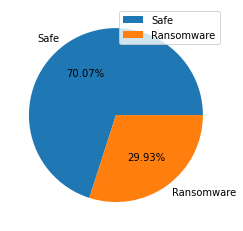

In [16]:
plt.pie(df.legitimate.value_counts().values.tolist(), labels=['Safe','Ransomware'], autopct='%.2f%%')
plt.legend()
plt.show()

In [17]:
df.md5.nunique()

138047

In [18]:
df.md5.shape[0]

138047

In [19]:
df.shape[1]

57

In [20]:
df.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [21]:
df.dtypes

Name                             object
md5                              object
Machine                           int64
SizeOfOptionalHeader              int64
Characteristics                   int64
MajorLinkerVersion                int64
MinorLinkerVersion                int64
SizeOfCode                        int64
SizeOfInitializedData             int64
SizeOfUninitializedData           int64
AddressOfEntryPoint               int64
BaseOfCode                        int64
BaseOfData                        int64
ImageBase                       float64
SectionAlignment                  int64
FileAlignment                     int64
MajorOperatingSystemVersion       int64
MinorOperatingSystemVersion       int64
MajorImageVersion                 int64
MinorImageVersion                 int64
MajorSubsystemVersion             int64
MinorSubsystemVersion             int64
SizeOfImage                       int64
SizeOfHeaders                     int64
CheckSum                          int64


In [22]:
# Using VIF to remove highly correlated columns
from statsmodels.stats.outliers_influence import variance_inflation_factor


cols_vif = df.columns.tolist()
cols_vif.remove('legitimate')
cols_vif.remove('md5')
cols_vif.remove('Name')
cols_vif


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = cols_vif

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df[cols_vif].values, i)
                          for i in range(len(cols_vif))]

print(vif_data)

                        feature           VIF
0                       Machine      1.186131
1          SizeOfOptionalHeader      0.021589
2               Characteristics      1.440607
3            MajorLinkerVersion      1.192645
4            MinorLinkerVersion      1.501310
5                    SizeOfCode      5.133825
6         SizeOfInitializedData      1.566659
7       SizeOfUninitializedData      1.000313
8           AddressOfEntryPoint      1.071061
9                    BaseOfCode      4.264921
10                   BaseOfData      1.920017
11                    ImageBase      1.001121
12             SectionAlignment      2.060314
13                FileAlignment      1.078991
14  MajorOperatingSystemVersion      1.000036
15  MinorOperatingSystemVersion      4.159906
16            MajorImageVersion    201.084240
17            MinorImageVersion    183.367439
18        MajorSubsystemVersion      0.610479
19        MinorSubsystemVersion  17295.637639
20                  SizeOfImage   

In [23]:
df.drop(['MinorImageVersion','MinorSubsystemVersion','SizeOfHeapCommit','SectionsMinRawsize','SectionsMinVirtualsize','SectionMaxVirtualsize' ],axis=1, inplace=True)

<AxesSubplot:>

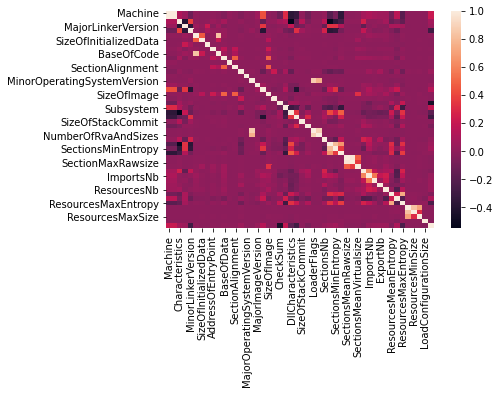

In [24]:
sns.heatmap(df.corr())

In [25]:
def iv_woe(data, target, bins=10, show_woe=False):

    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [26]:
df.legitimate = df.legitimate.astype('int64')

In [27]:
iv, woe = iv_woe(df.drop(['Name'],axis=1), 'legitimate')

Information value of md5 is 1.240653
Information value of Machine is 2.596527
Information value of SizeOfOptionalHeader is 2.596853
Information value of Characteristics is 3.823743
Information value of MajorLinkerVersion is 2.787002
Information value of MinorLinkerVersion is 0.583745
Information value of SizeOfCode is 2.5136
Information value of SizeOfInitializedData is 3.569039
Information value of SizeOfUninitializedData is 0.328101
Information value of AddressOfEntryPoint is 2.351206
Information value of BaseOfCode is 0.031301
Information value of BaseOfData is 2.974971
Information value of ImageBase is 6.097249
Information value of SectionAlignment is 0.163236
Information value of FileAlignment is 0.153303
Information value of MajorOperatingSystemVersion is 4.34342
Information value of MinorOperatingSystemVersion is 0.475603
Information value of MajorImageVersion is 0.181241
Information value of MajorSubsystemVersion is 3.566766
Information value of SizeOfImage is 2.965568
Informat

In [28]:
iv.sort_values(by = 'IV', ascending=False)

,Variable,IV
0,ImageBase,6.097249
0,VersionInformationSize,5.187680
0,SectionsMaxEntropy,4.978054
0,MajorOperatingSystemVersion,4.343420
0,ResourcesMinSize,4.272744
0,SizeOfStackReserve,4.161116
0,Characteristics,3.823743
0,SizeOfInitializedData,3.569039
0,MajorSubsystemVersion,3.566766
0,ResourcesNb,3.088450


In [29]:
features = iv.sort_values(by = 'IV', ascending=False)['Variable'][:15].values.tolist()
features

['ImageBase',
 'VersionInformationSize',
 'SectionsMaxEntropy',
 'MajorOperatingSystemVersion',
 'ResourcesMinSize',
 'SizeOfStackReserve',
 'Characteristics',
 'SizeOfInitializedData',
 'MajorSubsystemVersion',
 'ResourcesNb',
 'Subsystem',
 'ResourcesMinEntropy',
 'BaseOfData',
 'SizeOfImage',
 'MajorLinkerVersion']

In [30]:
X = df[features]
Y = df['legitimate']

# Split your data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

# Print the shapes to verify consistency
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (117339, 15)
Shape of X_test: (20708, 15)
Shape of Y_train: (117339,)
Shape of Y_test: (20708,)


In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

max_words = 800
max_len = 100



X = df[features].values.astype(np.float32)
Y = df['legitimate']
print(Y)


X = pad_sequences(X, maxlen=max_len, padding='post', truncating='post', dtype='float32')
print('Shape of data tensor:', X.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.15)

le = LabelEncoder()
Y_train_enc = le.fit_transform(Y_train)
Y_train_enc = to_categorical(Y_train_enc)

Y_test_enc = le.transform(Y_test)
Y_test_enc = to_categorical(Y_test_enc)

print(Y_train_enc)

0         1
1         1
2         1
3         1
4         1
         ..
138042    0
138043    0
138044    0
138045    0
138046    0
Name: legitimate, Length: 138047, dtype: int64
Shape of data tensor: (138047, 100)
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# BILSTM Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# BILSTM for binary classification
def bilstm_model(input_shape):
    model = Sequential()
    model.add(Dense(128, activation="softsign", input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation="softsign"))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation="softsign"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid", name="out_layer"))
    
    return model

# Split your data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

# Define the input shape based on your X_train shape
input_shape = X_train.shape[1:]

# Create the model
model = bilstm_model(input_shape)
print(model.summary())

# Compile the model for binary classification
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, batch_size=256, epochs=15, validation_data=(X_test, Y_test), verbose=1)

# Save the trained model
model.save("classification_model.h5")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 1

648/648 [==============================] - 2s 3ms/step


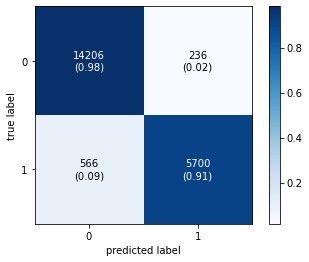

In [33]:
y_test_pred = model.predict(X_test)
cm = confusion_matrix(Y_test.round(), y_test_pred.round())

plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.savefig("confusion_matrix.png")
plt.show()

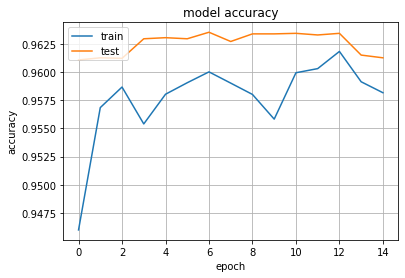

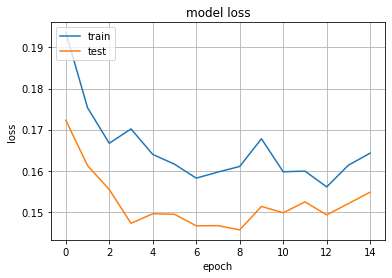

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.savefig("accuracy.png")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.savefig("loss.png")
plt.show()

In [35]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)

print("Test set loss: {:.4f}".format(loss))
print("Test set accuracy: {:.4f}".format(accuracy))

648/648 [==============================] - 4s 6ms/step - loss: 0.1548 - accuracy: 0.9613
Test set loss: 0.1548
Test set accuracy: 0.9613


In [36]:
pip install pytorch_tabnet

Note: you may need to restart the kernel to use updated packages.


# TabNet Model


In [123]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define categorical columns if any (use an empty list if none)
categorical_columns = []

# Create a TabNetClassifier
clf = TabNetClassifier(
    n_d=64,  # Dimension of the model (default: 64)
    n_a=32,  # Attention dimension (default: 32)
    n_steps=3,  # Number of decision steps (default: 3)
    gamma=1.5,  # Scaling factor for the entropy term (default: 1.5)
    lambda_sparse=1e-3,  # Sparse penalty term (default: 1e-3)
    cat_dims=[len(X_train[col].unique()) for col in categorical_columns],  # Number of categories for categorical features
    cat_emb_dim=1,  # Dimension of embeddings for categorical features
    optimizer_fn=torch.optim.Adam,  # Optimizer for training (default: Adam)
    optimizer_params=dict(lr=2e-2),  # Optimizer parameters (default: 2e-2)
    scheduler_params=dict(
        mode="min", patience=10, min_lr=1e-5, factor=0.1
    ),  # Scheduler parameters (default: None)
    scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
)

# Train the TabNetClassifier
clf.fit(
    X_train, y_train,  # Remove .values here
    eval_set=[(X_test, y_test)],  # Remove .values here
    eval_name=["test"],
    eval_metric=["accuracy"],
    max_epochs=100,  # Adjust the number of training epochs
    patience=20,  # Patience for early stopping
    batch_size=1024,  # Batch size for training
    virtual_batch_size=128,  # Virtual batch size (default: 128)
)
# Ensure the model is in evaluation mode
clf.network.eval()

with torch.no_grad():  # Disable gradient computation
    outputs, _ = clf.network(X_train_tensor)  # Get model outputs for training data
    loss = F.cross_entropy(outputs, y_train_tensor)  # Compute loss
    max_epochs=100,  # Adjust the number of training epochs
    patience=20,  # Patience for early stopping
    batch_size=1024,  # Batch size for training
    virtual_batch_size=128,  # Virtual batch size (default: 128)

    # Compute accuracy
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_train_tensor).sum().item()
    accuracy = correct / len(y_train)

print(f"Final Model Evaluation on Training Data:")
print(f"val_loss: {loss.item():.5f} - val_accuracy: {accuracy:.5f}")
print("-------------------------------------------------")
# Evaluate the model
test_acc = clf.history["test_accuracy"][-1]
print(f"Test accuracy: {test_acc:.4f}")
# Extract validation loss and accuracy for each epoch
# Save the trained model
model.save("tabnet_model.h5")

epoch 0  | loss: 0.13513 | test_accuracy: 0.91909 |  0:00:18s
epoch 1  | loss: 0.05578 | test_accuracy: 0.97914 |  0:00:36s
epoch 2  | loss: 0.05216 | test_accuracy: 0.98091 |  0:00:55s
epoch 3  | loss: 0.04731 | test_accuracy: 0.98468 |  0:01:13s
epoch 4  | loss: 0.05076 | test_accuracy: 0.98461 |  0:01:32s
epoch 5  | loss: 0.0454  | test_accuracy: 0.9841  |  0:01:50s
epoch 6  | loss: 0.04288 | test_accuracy: 0.9858  |  0:02:08s
epoch 7  | loss: 0.04391 | test_accuracy: 0.98537 |  0:02:27s
epoch 8  | loss: 0.04044 | test_accuracy: 0.98446 |  0:02:45s
epoch 9  | loss: 0.0419  | test_accuracy: 0.9853  |  0:03:05s
epoch 10 | loss: 0.03921 | test_accuracy: 0.98432 |  0:03:23s
epoch 11 | loss: 0.03975 | test_accuracy: 0.98222 |  0:03:42s
epoch 12 | loss: 0.03622 | test_accuracy: 0.98044 |  0:04:01s
epoch 13 | loss: 0.03504 | test_accuracy: 0.98037 |  0:04:19s
epoch 14 | loss: 0.03466 | test_accuracy: 0.98171 |  0:04:37s
epoch 15 | loss: 0.03423 | test_accuracy: 0.98233 |  0:04:55s
epoch 16

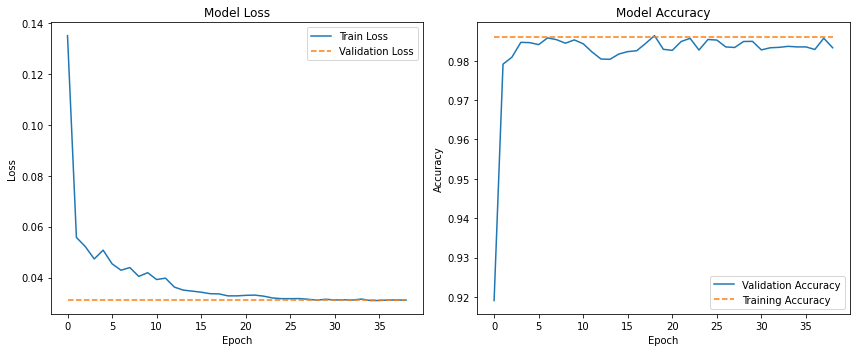

In [124]:
import matplotlib.pyplot as plt

# Extract training and validation loss and accuracy from the model's history
train_loss = clf.history['loss']

# Predictions would be class labels.
predictions = clf.predict(X_train)
accuracy = (predictions == y_train).mean()

val_loss = [train_loss[-1] for _ in train_loss]  # Assuming the last training loss is representative for visualization purposes

# Plotting
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss', linestyle='--')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(clf.history['test_accuracy'], label='Validation Accuracy')
train_accuracy = [accuracy for _ in clf.history['test_accuracy']]  # Repeated final accuracy for visualization
plt.plot(train_accuracy, label='Training Accuracy', linestyle='--')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


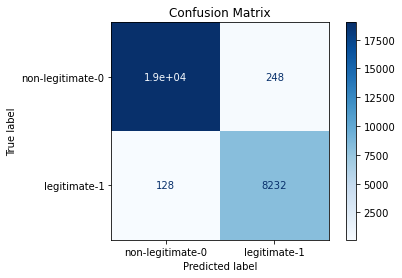

In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained and have the model loaded as 'clf'

# Use the model to make predictions on the test set
y_test_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["non-legitimate-0", "legitimate-1"])
disp.plot(cmap=plt.cm.Blues, values_format=".4g")

plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()


In [126]:
# Evaluate the TabNetClassifier on the test set
preds = clf.predict(X_test)
accuracy = (preds == y_test).mean()

print("Test set accuracy: {:.4f}".format(accuracy))

Test set accuracy: 0.9864



# HYBRID STARTS FROM HERE(BILSTM + TabNet combination)


In [ ]:
from tensorflow.keras.models import load_model

# Load your pre-trained BiLSTM model
bilstm_model = load_model("classification_model.h5")


In [ ]:
num_features = X_train.shape[1]
input_shape_tabnet = (num_features,)  # Adjust num_features as needed
input_shape_tabnet

In [ ]:
from tensorflow.keras.layers import Input

input_layer_tabnet = Input(shape=input_shape_tabnet)
input_layer_tabnet

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam

# Load your data here and preprocess it as needed
# X should contain your features, and Y should contain your labels


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
#HYBRID MODEL

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Input, concatenate
from tensorflow.keras.utils import to_categorical

# Load your data and preprocess it
# Replace X and Y with your actual data

# Step 1: Split the data into train and test sets
X_train_tabnet, X_test_tabnet, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 2: Train the TabNet model
tabnet_model = TabNetClassifier(
    n_d=64,  # Dimension of the model (default: 64)
    n_a=32,  # Attention dimension (default: 32)
    n_steps=3,  # Number of decision steps (default: 3)
    gamma=1.5,  # Scaling factor for the entropy term (default: 1.5)
    lambda_sparse=1e-3,  # Sparse penalty term (default: 1e-3)
    cat_dims=[],  # Number of categories for categorical features
    cat_emb_dim=1,  # Dimension of embeddings for categorical features
    optimizer_fn=torch.optim.Adam,  # Optimizer for training (default: Adam)
    optimizer_params=dict(lr=2e-2),  # Optimizer parameters (default: 2e-2)
    scheduler_params=dict(mode="min", patience=10, min_lr=1e-5, factor=0.1),
    scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
)
tabnet_model.fit(
    X_train_tabnet, y_train,
    eval_set=[(X_test_tabnet, y_test)],
    eval_name=["test"],
    eval_metric=["accuracy"],
    max_epochs=100,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
)

# Step 3: Extract TabNet Features
# Create an intermediate model to extract TabNet features
tabnet_features_model = torch.nn.Sequential(*list(tabnet_model.network.children())[:-1])


# Extract features from both train and test data
X_train_tabnet_features = tabnet_features_model(torch.tensor(X_train_tabnet).float())
X_test_tabnet_features = tabnet_features_model(torch.tensor(X_test_tabnet).float())
X_train_tabnet_features = X_train_tabnet_features.reshape((-1, 100, 1))
X_test_tabnet_features = X_test_tabnet_features.reshape((-1, 100, 1))

# Step 4: Train the BiLSTM model
#input_shape =X_train_tabnet_features.shape[100,1]  # 100 timesteps and 1 feature

#input_shape = (100, 1)
input_shape = (X_train_tabnet_features.shape[1], 1)  # This will give (100, 1) if the second dimension is 100.
X_train_tabnet_features_np = X_train_tabnet_features.detach().cpu().numpy()
X_test_tabnet_features_np = X_test_tabnet_features.detach().cpu().numpy()

bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Dense(128, activation="softsign"))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Dense(1, activation="sigmoid"))

bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#bilstm_model.fit(X_train_tabnet_features, y_train, epochs=15, batch_size=256, validation_data=(X_test_tabnet_features, y_test))
bilstm_model.fit(X_train_tabnet_features_np, y_train, epochs=15, batch_size=256, validation_data=(X_test_tabnet_features_np, y_test))


In [ ]:
# Step 5: Combine TabNet and BiLSTM Outputs
# Create a combined model
combined_input = Input(shape=(input_shape))
tabnet_output = tabnet_features_model(combined_input)
bilstm_output = bilstm_model(tabnet_output)
combined_model = Sequential()
combined_model.add(Dense(1, activation="sigmoid", input_shape=(1,)))

# Step 6: Evaluate the Hybrid Model

# Evaluate the BiLSTM model
X_test_tabnet_features_np = X_test_tabnet_features.cpu().numpy()
bilstm_scores = bilstm_model.evaluate(X_test_tabnet_features_np, y_test, verbose=0)

#bilstm_scores = bilstm_model.evaluate(X_test_tabnet_features, y_test, verbose=0)
print("BiLSTM Model - Test Loss:", bilstm_scores[0])
print("BiLSTM Model - Test Accuracy:", bilstm_scores[1])

# Evaluate the combined model
# Compile the model first
combined_model = Sequential()
combined_model.add(Dense(1, activation="relu", input_shape=(100,)))
combined_model.compile(optimizer='adam', 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

# Convert PyTorch tensor to numpy array
X_test_tabnet_features_np = X_test_tabnet_features.cpu().detach().numpy()
X_test_tabnet_features_np = X_test_tabnet_features_np.reshape(X_test_tabnet_features_np.shape[0], -1)

# Then, evaluate the model
combined_scores = combined_model.evaluate(X_test_tabnet_features_np, y_test, verbose=0)





# Compare the performance of the individual models and the hybrid model

# Fine-tune the hybrid model if necessary

# Save the final hybrid model

print("Combined Model - Test Loss:", combined_scores[0])
print("Combined Model - Test Accuracy:", combined_scores[1])
combined_model.save("hybrid_model.h5")

In [ ]:
# Step 5: Combine TabNet and BiLSTM Outputs
# Create a combined model
combined_input = Input(shape=(input_shape))
tabnet_output = tabnet_features_model(combined_input)
bilstm_output = bilstm_model(tabnet_output)
combined_model = Sequential()
combined_model.add(Dense(1, activation="sigmoid", input_shape=(1,)))
# Step 6: Evaluate the Hybrid Model

# Evaluate the BiLSTM model
X_test_tabnet_features_np = X_test_tabnet_features.cpu().numpy()
bilstm_scores = bilstm_model.evaluate(X_test_tabnet_features_np, y_test, verbose=0)

#bilstm_scores = bilstm_model.evaluate(X_test_tabnet_features, y_test, verbose=0)
print("BiLSTM Model - Test Loss:", bilstm_scores[0])
print("BiLSTM Model - Test Accuracy:", bilstm_scores[1])

# Evaluate the combined model
# Compile the model first
combined_model = Sequential()
combined_model.add(Dense(1, activation="relu", input_shape=(100,)))
combined_model.compile(optimizer='adam', 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

# Convert PyTorch tensor to numpy array
X_test_tabnet_features_np = X_test_tabnet_features.cpu().detach().numpy()
X_test_tabnet_features_np = X_test_tabnet_features_np.reshape(X_test_tabnet_features_np.shape[0], -1)

# Then, evaluate the model
combined_scores = combined_model.evaluate(X_test_tabnet_features_np, y_test, verbose=0)





# Compare the performance of the individual models and the hybrid model

# Fine-tune the hybrid model if necessary

# Save the final hybrid model
combined_model.fit(X_train_tabnet_features_np, y_train, epochs=50, batch_size=256, validation_data=(X_test_tabnet_features_np, y_test))
print("Combined Model - Test Loss:", combined_scores[0])
print("Combined Model - Test Accuracy:", combined_scores[1])
combined_model.save("hybrid_model.h5")